In [30]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', context='talk', palette = 'Dark2')

In [3]:
import praw 
reddit = praw.Reddit(client_id='KgFBUmRPl1whtw',
                     client_secret='gmOJmuS3iDRwrUnhmn0CYtpnGGY',
                     user_agent='LearnDataSci')

In [4]:
headlines = set()

In [75]:
for submission in reddit.subreddit('politics').new(limit = None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

1888


In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:10], width= 100)

[{'compound': 0.1027,
  'headline': 'Why Elizabeth Warren Needed to Apologize to the Cherokee Nation for Her DNA Test',
  'neg': 0.0,
  'neu': 0.903,
  'pos': 0.097},
 {'compound': 0.0,
  'headline': 'Economy adds 304K jobs in January',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.6808,
  'headline': 'The Senate and intelligence community rebuked Trump on national security this week. '
              'Here’s why that matters – a lot.',
  'neg': 0.0,
  'neu': 0.68,
  'pos': 0.32},
 {'compound': 0.0,
  'headline': "Trump's trade plan against China is working",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.9274,
  'headline': 'Scientists have discovered how autophagy, which had previously been thought to fuel '
              'cancer growth may actually prevent early cancer development by promoting the death '
              'of cells in crisis.',
  'neg': 0.382,
  'neu': 0.477,
  'pos': 0.141},
 {'compound': 0.4404,
  'headline': "Kellyanne Conway Just Made The S

In [66]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.1027,Why Elizabeth Warren Needed to Apologize to th...,0.000,0.903,0.097
1,0.0000,Economy adds 304K jobs in January,0.000,1.000,0.000
2,0.6808,The Senate and intelligence community rebuked ...,0.000,0.680,0.320
3,0.0000,Trump's trade plan against China is working,0.000,1.000,0.000
4,-0.9274,"Scientists have discovered how autophagy, whic...",0.382,0.477,0.141


In [73]:
df['label'] = 0
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] > -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.1027,Why Elizabeth Warren Needed to Apologize to th...,0.000,0.903,0.097,-1
1,0.0000,Economy adds 304K jobs in January,0.000,1.000,0.000,-1
2,0.6808,The Senate and intelligence community rebuked ...,0.000,0.680,0.320,-1
3,0.0000,Trump's trade plan against China is working,0.000,1.000,0.000,-1
4,-0.9274,"Scientists have discovered how autophagy, whic...",0.382,0.477,0.141,0


df.label.value_counts()

In [77]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:100], width = 200)

print("Negative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:100], width = 200)

Positive headlines:

[]
Negative headlines:

['Why Elizabeth Warren Needed to Apologize to the Cherokee Nation for Her DNA Test',
 'Economy adds 304K jobs in January',
 'The Senate and intelligence community rebuked Trump on national security this week. Here’s why that matters – a lot.',
 "Trump's trade plan against China is working",
 "Kellyanne Conway Just Made The Strongest Case For Not Building Trump's Wall",
 'Democrat Cory Booker announces White House run',
 'The costs of climate change could reach 10 percent of the entire U.S. economy by the end of the century.',
 'Scientists have used a Nobel-prize winning chemistry technique (Spectroscopic Single Particle Reconstruction) on a mixture of metals to potentially reduce the cost of fuel cells used in electric '
 'cars and reduce harmful emissions from conventional vehicles',
 'Utah GOP lawmakers move to limit voter-approved Medicaid expansion',
 'Researchers in the US demonstrate “gene drive”, breaking the normal rules of inheritan

In [78]:
df.label.value_counts(normalize=True) * 100

-1    67.835942
 0    32.164058
Name: label, dtype: float64

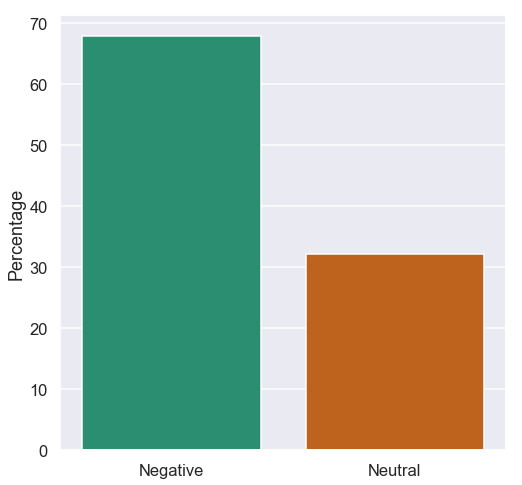

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x = counts.index, y = counts, ax = ax)
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [33]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is a example sentenc! However, it isn't a very informative one"
print(word_tokenize(example, language = 'english'))

['This', 'is', 'a', 'example', 'sentenc', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [34]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'a', 'example', 'sentenc', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [35]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [36]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
        
    return tokens

In [41]:
pos_lines = list(df[df.label == -1].headline)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(100)

[('trump', 179),
 ('2020', 43),
 ('northam', 37),
 ('russia', 36),
 ('says', 36),
 ('booker', 34),
 ('new', 32),
 ('warren', 31),
 ('president', 31),
 ('cory', 29),
 ('democrats', 29),
 ('us', 28),
 ('treaty', 26),
 ('wall', 25),
 ('u', 25),
 ('yearbook', 25),
 ('blackface', 24),
 ('virginia', 23),
 ('photo', 22),
 ('elizabeth', 21),
 ('kkk', 19),
 ('court', 18),
 ('presidential', 18),
 ('state', 17),
 ('nuclear', 17),
 ('governor', 17),
 ('ralph', 17),
 ('tax', 16),
 ('test', 16),
 ('democrat', 16),
 ('house', 16),
 ('senate', 15),
 ('border', 15),
 ('harris', 14),
 ('mueller', 14),
 ('could', 14),
 ('page', 14),
 ('shows', 14),
 ('gov', 14),
 ('schultz', 13),
 ('bill', 13),
 ('donald', 13),
 ('union', 13),
 ('democratic', 13),
 ('nation', 12),
 ('dna', 12),
 ('campaign', 12),
 ('arms', 12),
 ('gop', 12),
 ('climate', 12),
 ('kamala', 12),
 ('venezuela', 12),
 ('men', 12),
 ('cherokee', 11),
 ('announces', 11),
 ('white', 11),
 ('dem', 11),
 ('bid', 11),
 ('former', 10),
 ('security',

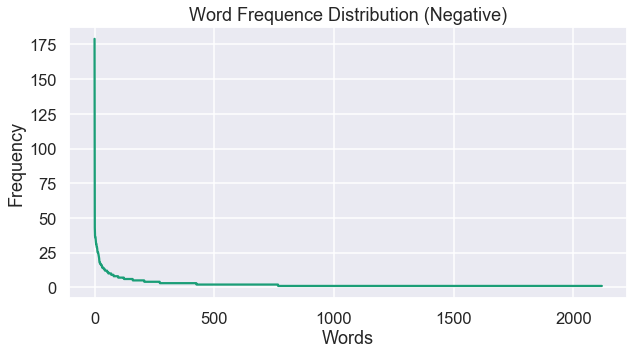

In [42]:
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize = (10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequence Distribution (Negative)")
plt.show()